## Define no - belly regime for N' and N'' (increasing with depth)

$N(z)=N_0 + N'(z-z_0) + N''(z-z_0)^2$, where $N_0$ is the concentration at $z_0$. I will start with $z_0=H_s$, so $N_0$ is a reference concentration at shelf break depth.
 
 Non-dimensional profile:
 
 $\hat{N(z)}=\frac{N(z)}{N_0} = 1 + \hat{N'}(z-Hs) + \hat{N''}(z-H_s)^2$,
 
 where $\hat{}$ variables are divided by $N_0$.
 
 I can't use a non-dim profile for my model so I need o define dimensional regimes where N' and N'' give reasonable concentrations. For the non-dimesional case I found $0.0<\hat{N'}<0.006$ and $0.0001<\hat{N''}<0.00001$.
 
 

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sympy as sym
import seaborn as sns
sym.init_printing() # enable fancy printing

/Users/Karina/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
# Set appearance options seaborn
sns.set_style('white')
sns.set_context('notebook')

In [4]:
# Constants and scales from canyon bathy

#L = 6400.0 # canyon length
#R = 5000.0 # Upstream radius of curvature
#g = 9.81 # accel. gravity
#Wsb = 13000 # Width at shelf break
#Hs = 147.5 # Shelf break depth
#Hh = 97.5 # 
#Hr = 130.0 # rim depth at dn station
# NOTE: The default values of all functions correspond to the base case


In [20]:
C1,C2,z,Co,Hs,tau,Z = sym.symbols('C1,C2,z,Co,Hs,tau, Z')
func = Co + C1*(z-Hs) + C2*((z-Hs)**2)


In [6]:
func

A reasonable number for $\hat{C'}$ is 0.006. This comes from the slope of the linear nitrate profile I use $d\hat{C}/dz \approx ((32\mu M-3 \mu M)/(150 m))/32 \mu M$. Using a higher value gives negative concetrations at surface.

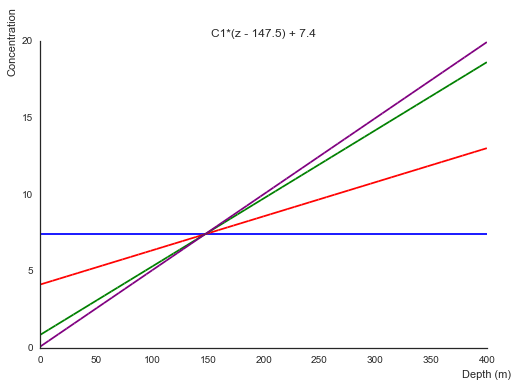

In [7]:
func = 7.4 + C1*(z-Hs) + C2*((z-Hs)**2)
func = func.subs({Hs:147.5,C2:0})
hand =sym.plot(func.subs(C1,0.0*7.4),
               func.subs(C1,0.003*7.4),
               func.subs(C1,0.006*7.4),
               func.subs(C1,0.0067*7.4),(z, 0, 400),
               xlabel='Depth (m)',
               ylabel='Concentration',
               title='%s' %func,
               show=False)
hand[1].line_color='r'
hand[2].line_color='g'
hand[3].line_color='purple'

hand.show()

### What should be the value of $\hat{C''}$ to get stable profiles given an $\hat{C'}$? 

i.e. Profiles without 'bellies' (max, mins or inflection points). This might not be necessary but I want to classify them.

There are bellies wherever 

$d\hat{C}/dz=\hat{C'}+2\hat{C''}(z-Hs)=0$. (1)

I don't want these points (I'll call them $z_{belly}$) to be within my profile ($0\le z \le 400$), so I have the conditions:

$z_{belly} \le 0 $ ,  $z_{belly} \ge 400$ (2),

but solving (1) for $z_{belly}$ gives,

$z_{belly}=\frac{-\hat{C'}}{2\hat{C''}}+Hs$ (3). 

Taking the equalities in conditions (2) and equating to (3) gives:

(4) $\frac{\hat{C'}}{2Hs}\ge {\hat{C''}}$ and (5) $\frac{\hat{C'}}{2(Hs-400)}\le {\hat{C''}}$, 

for a given $ 0\le\hat{C'}$ (since I want increasing profiles)

The region that satisfies conditions (4) and (5) is the triangle plotted below. Also, these hold for the dimensional parameters $C'$ and $C''$, where $  0 \le C'$





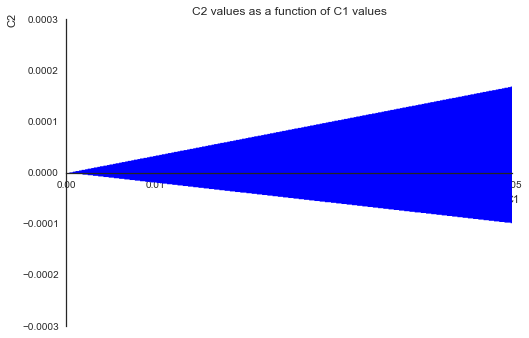

In [10]:
p2 = sym.plot_implicit(sym.And(C1/(2*(-400+147.5)) < C2,C1/(2*147.5) > C2),
                       (C1,0,0.05),(C2,-0.0003,0.0003),
                      title='C2 values as a function of C1 values')


Let's see if it works...

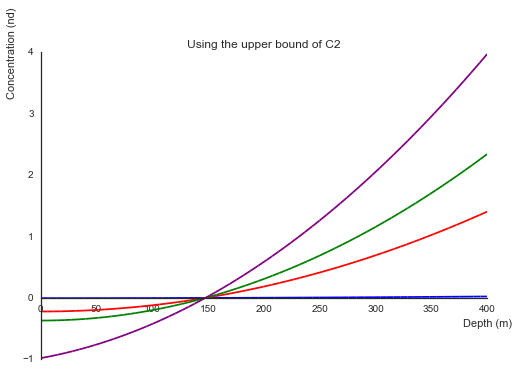

In [13]:
func = 0 + C1*(z-Hs) + C2*((z-Hs)**2)
hand = sym.plot(func.subs({C1:0.00005,Hs:147.5,C2:0.00005/(2*147.5)}),
               func.subs({C1:0.003,Hs:147.5,C2:0.003/(2*147.5)}),
               func.subs({C1:0.005,Hs:147.5,C2:0.005/(2*147.5)}),
               func.subs({C1:0.01,Hs:147.5,C2:0.0067/(2*147.5)}),(z, 0, 400),
               xlabel='Depth (m)',
               ylabel='Concentration (nd)',
               title='Using the upper bound of C2',
               show=False)
hand[1].line_color='r'
hand[2].line_color='g'
hand[3].line_color='purple'

hand.show()

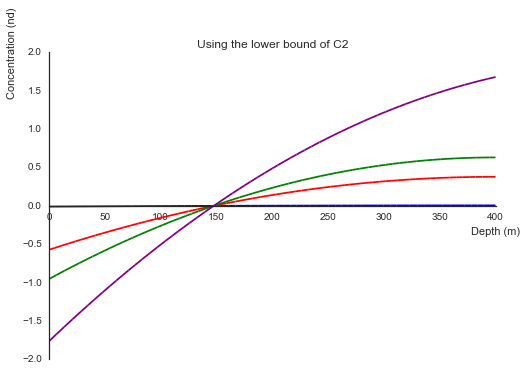

In [14]:
func = 0 + C1*(z-Hs) + C2*((z-Hs)**2)
hand = sym.plot(func.subs({C1:0.00005,Hs:147.5,C2:0.00005/(2*(147.5-400))}),
               func.subs({C1:0.003,Hs:147.5,C2:0.003/(2*(147.5-400))}),
               func.subs({C1:0.005,Hs:147.5,C2:0.005/(2*(147.5-400))}),
               func.subs({C1:0.01,Hs:147.5,C2:0.0067/(2*(147.5-400))}),(z, 0, 400),
               xlabel='Depth (m)',
               ylabel='Concentration (nd)',
               title='Using the lower bound of C2',
               show=False)
hand[1].line_color='r'
hand[2].line_color='g'
hand[3].line_color='purple'

hand.show()

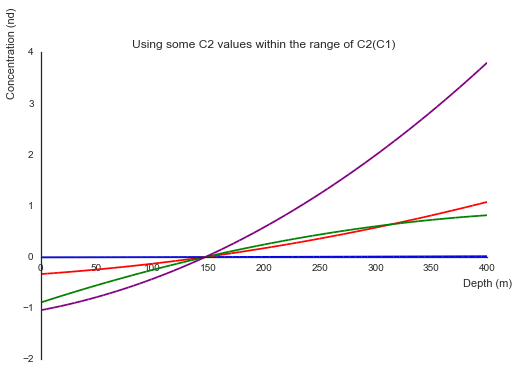

In [15]:
func = 0 + C1*(z-Hs) + C2*((z-Hs)**2)
hand = sym.plot(func.subs({C1:0.00005,Hs:147.5,C2:0.5e-7}),
               func.subs({C1:0.003,Hs:147.5,C2:0.5e-5}),
               func.subs({C1:0.005,Hs:147.5,C2:-0.7E-5}),
               func.subs({C1:0.01,Hs:147.5,C2:0.00002}),(z, 0, 400),
               xlabel='Depth (m)',
               ylabel='Concentration (nd)',
               title='Using some C2 values within the range of C2(C1)',
               show=False)
hand[1].line_color='r'
hand[2].line_color='g'
hand[3].line_color='purple'

hand.show()



## $\tau_v$ as a function of N' and N''

$$\frac{\tau}{Z}=\frac{\delta^2_vN}{\delta_vN}=Z\frac{\delta^2_vN}{\delta_vN}\rvert_{z=Hs}=\frac{2N''}{N'}$$

We have some bounds for N' and N'': we imposed $0\le N'$ and $N'/2Hs\ge N''$ and $N''\ge N'/(2(Hs-400))$ to have a profile with no max, mins or inflection points above 400 m.

Using these bounds, we can now bound the values of \tau_v/Z:

$$\frac{\tau}{Z}=\frac{N''}{N'} \le \frac{2N'}{2HsN'} = \frac{1}{Hs}$$

and

$$\frac{\tau}{Z}=\frac{N''}{N'} \ge \frac{2N'}{2N'(Hs-400)} = \frac{1}{Hs-400}$$

These bounds do not depend on N' or N'', only on Hs.

So,

$$ \frac{1}{Hs-400} \le \frac{\tau}{Z} \le \frac{1}{Hs}$$

Hs=0 and 400 m are asymptotes, but that is fine. If Hs = 0 it means you don't even have a shelf and if Hs=400 m you probbaly care about not having bellies deeper than that, so 400 m wouldn't even be an asymptote in the first place.

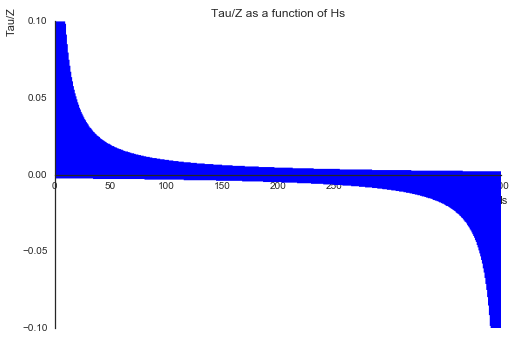

In [16]:
p2 = sym.plot_implicit(sym.And(1/Hs > tau, 1/(Hs-400)< tau), (Hs, 0, 400),(tau,-0.1,0.1),
                      title='Tau/Z as a function of Hs',
                      ylabel='Tau/Z')


In the idealized bathymetry Hs=147.5 m, so the bounds are: $-0.004  \le \frac{\tau}{Z} \le 0.007$, units are m$^{-1}$. If I say that Z can be between 0 and 100 m then the values of $\tau_v$ can be:

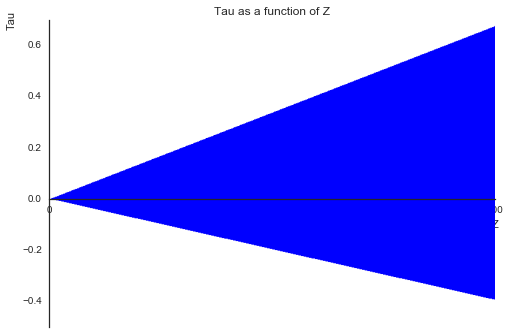

In [23]:
p2 = sym.plot_implicit(sym.And(Z/147.5 > tau, Z/(147.5-400)< tau), (Z, 0, 100),(tau,-0.5,0.7),
                      title='Tau as a function of Z',
                      ylabel='Tau')


### Regime definition

Now we have all the elements to define a range of values for $N'$, $N''$ and $\tau_v$:

(1) Linear profiles that increase with depth:

$$0 \le N'$$.


(2) No maximums, minimums or inflection points above 400 m (No bellies) given an $N'$:

$$\frac{\hat{N'}}{2Hs}\ge {\hat{N''}} \,and \,  \frac{\hat{N'}}{2(Hs-400)}\le {\hat{N''}}$$. 

Using these bounds, the regime of values of $\tau/Z$ is:

$$ \frac{1}{Hs-400} \le \frac{\tau}{Z} \le \frac{1}{Hs}$$.

For our value of Hs, 

$$ -0.004 \le \frac{\tau}{Z} \le 0.007$$.





N1=0.1000, N2min=-1.980e-04, Tau/Z=-3.960e-03 
 N1=0.1000, N2max=3.390e-04, Tau/Z=6.780e-03 
 
N1=0.0500, N2min=-9.901e-05, Tau/Z=-3.960e-03 
 N1=0.0500, N2max=1.695e-04, Tau/Z=6.780e-03 
 
N1=0.0200, N2min=-3.960e-05, Tau/Z=-3.960e-03 
 N1=0.0200, N2max=6.780e-05, Tau/Z=6.780e-03 
 
N1=0.0100, N2min=-1.980e-05, Tau/Z=-3.960e-03 
 N1=0.0100, N2max=3.390e-05, Tau/Z=6.780e-03 
 
N1=0.0050, N2min=-9.901e-06, Tau/Z=-3.960e-03 
 N1=0.0050, N2max=1.695e-05, Tau/Z=6.780e-03 
 
N1=0.0010, N2min=-1.980e-06, Tau/Z=-3.960e-03 
 N1=0.0010, N2max=3.390e-06, Tau/Z=6.780e-03 
 


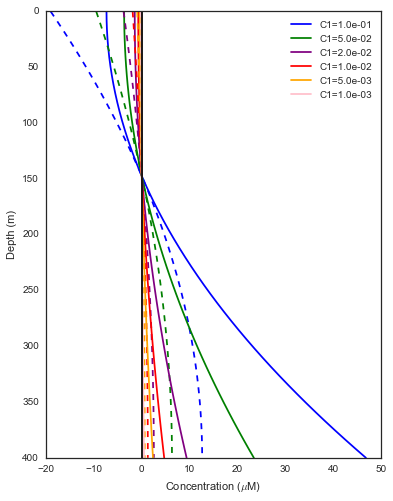

In [17]:
Hs = 147.5
No = 0

Nprime = np.array([0.1, 0.05,0.02,0.01,0.005,0.001])
z = np.linspace(0,400,50)

labels = ['C1=%1.1e'% Nprime[0],'C1=%1.1e'% Nprime[1],'C1=%1.1e'% Nprime[2],
          'C1=%1.1e'% Nprime[3],'C1=%1.1e'% Nprime[4],'C1=%1.1e'% Nprime[5]]
colors = ['blue','green','purple','red','orange','pink']
fig,ax = plt.subplots(1,1,figsize=(6,8))

for N1,lab,cc in zip(Nprime,labels,colors):
    N2min = N1/(2*(Hs-400))
    N2max = N1/(2*Hs)
    
    Nmin = No + N1*(z-Hs) + N2min*(z-Hs)**2
    Nmax = No + N1*(z-Hs) + N2max*(z-Hs)**2
    
    ax.plot(Nmin,z, '--', color=cc)
    ax.plot(Nmax,z,'-', color=cc, label=lab)
    
    Tau_max = 2*N2max/(N1)
    Tau_min = 2*N2min/(N1)
    
    print('N1=%1.4f, N2min=%1.3e, Tau/Z=%1.3e \n N1=%1.4f, N2max=%1.3e, Tau/Z=%1.3e \n '
          %(N1,N2min,Tau_min,N1,N2max,Tau_max))

ax.set_xlabel('Concentration ($\mu$M)')
ax.set_ylabel('Depth (m)')
ax.invert_yaxis()
ax.axvline(0, color='k')
ax.legend(loc=0)

The linear profile I have used for all runs has:

$C'=(2.2\mu M-45.3\mu M)/(0m-1200m)=0.359 \mu M m^{-1}$

so, ${C'}=0.3 \mu M m^{-1}$


N1=0.0401, N2mean=-7.931e-05, Tau/Z=5.370e-03 



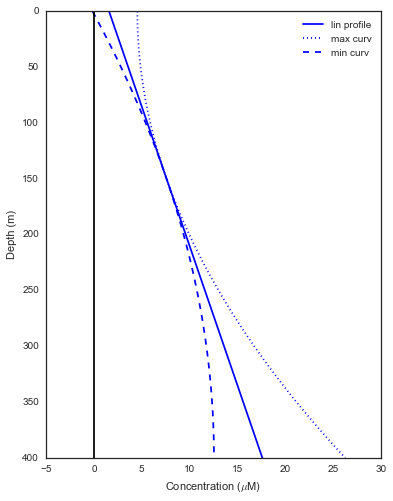

In [18]:
Hs = 147.5
No = 7.49
Nprime = np.array([0.3/No])
z = np.linspace(0,400,50)

labels = ['C1=0.047']
colors = ['blue','green','purple','red','orange','pink']
fig,ax = plt.subplots(1,1,figsize=(6,8))

for N1,lab,cc in zip(Nprime,labels,colors):
    N2min = N1/(2*(Hs-400)) 
    N2max = N1/(2*Hs)
    N2mean = (N2max-N2min)/2
    
    Nmean = No + N1*(z-Hs)
    Nmax = No + N1*(z-Hs) + N2max*(z-Hs)**2
    Nmin = No + N1*(z-Hs) + N2min*(z-Hs)**2
    
    ax.plot(Nmean,z,'-', color=cc, label='lin profile')
    ax.plot(Nmax,z,':', color=cc, label='max curv')
    ax.plot(Nmin,z,'--', color=cc, label='min curv')
    
    Tau_mean = 2*N2mean/(N1)
    
    print('N1=%1.4f, N2mean=%1.3e, Tau/Z=%1.3e \n'
          %(N1,N2min,Tau_mean))

ax.set_xlabel('Concentration ($\mu$M)')
ax.set_ylabel('Depth (m)')
ax.invert_yaxis()
ax.axvline(0, color='k')
ax.legend(loc=0)